# Import Libraries

In [39]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.layers import Dense ,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping

# Import Data

In [6]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [8]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
y_train.shape

(50000, 1)

In [13]:
y_test.shape

(10000, 1)

# Resize y_train,y_test

In [15]:
# Resize y_train , y_test

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Viewing Image

In [16]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [20]:
def plot_image(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

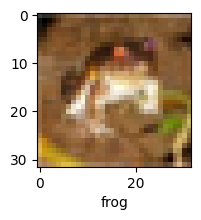

In [24]:
plot_image(X_train,y_train,0)

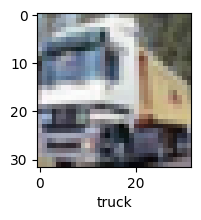

In [25]:
plot_image(X_train,y_train,1)

In [19]:
import matplotlib.pyplot as plt

# Normalizing pixel values of data

In [27]:
X_train = X_train/255
X_test = X_test/255

# Model Building

In [37]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape =(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu',input_shape =(32,32)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation ='relu'))
model.add(Dense(10,activation ='softmax'))

In [38]:
model.compile(optimizer = 'adam',
              loss ='sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [42]:
model.fit(X_train,y_train,epochs=10 )

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.4681 - loss: 1.4815
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.6030 - loss: 1.1217
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.6561 - loss: 0.9876
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.6776 - loss: 0.9209
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.7046 - loss: 0.8566
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7140 - loss: 0.8182
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.7371 - loss: 0.7604
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 44ms/step - accuracy: 0.7516 - loss: 0.7189
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.7661 - loss: 0.6812
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.7699 - loss: 0.6566


In [43]:
model.evaluate(X_train,y_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7801 - loss: 0.6298


[0.6355917453765869, 0.7798200249671936]

In [44]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6851 - loss: 0.9549


[0.9456604719161987, 0.6890000104904175]

# Predicting Values

In [45]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [46]:
y_pred = [np.argmax(i) for i in y_prob]

# Testing model over testing data

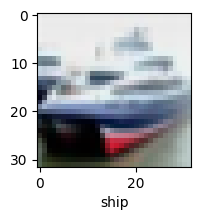

In [53]:
plot_image(X_test,y_pred,1)

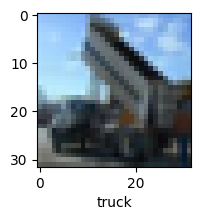

In [61]:
plot_image(X_test,y_pred,50)